In [1]:
import pandas as pd
import numpy as np
import re
from decimal import Decimal
import matplotlib.pyplot as plt

In [136]:
orders = pd.read_csv("data/Orders.csv")
returns = pd.read_csv("data/Returns.csv")

In [137]:
returns.columns = returns.columns.str.replace('Order ID','Order.ID')

In [138]:
orders['Sales'] = orders['Sales'].replace('[\$,]', '', regex=True).astype(float)
orders['Profit'] = orders['Profit'].replace('[\$,]', '', regex=True).astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185183745F8>,
      dtype=object)

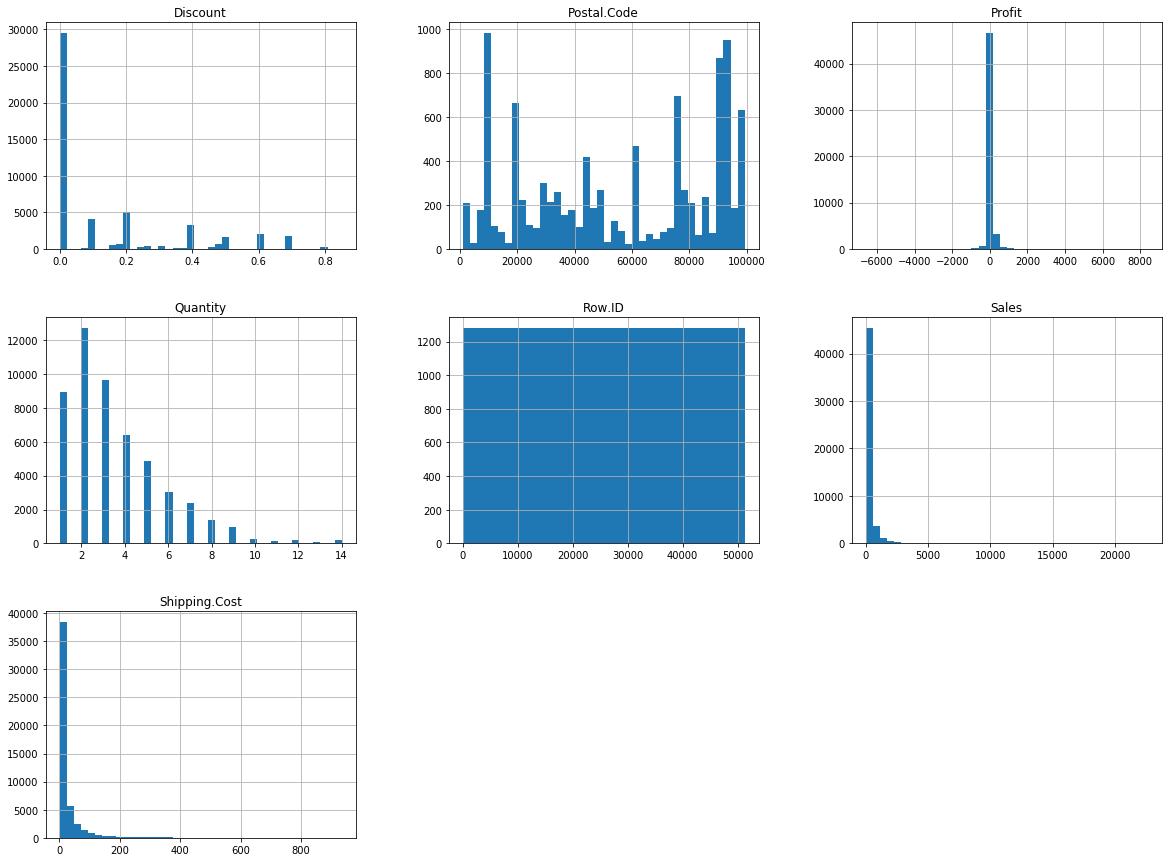

In [139]:
orders.hist(bins= 40, figsize=(20,15))

In [140]:
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'], format="%m/%d/%y")
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'], format="%m/%d/%y")

In [141]:
df = orders.groupby('Order.Date')['Quantity'].sum()
df = df.to_frame().reset_index()

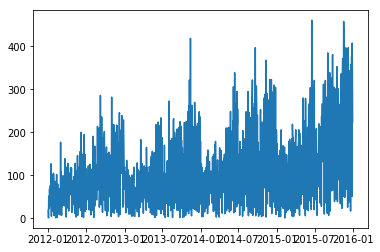

In [142]:
# plt.bar(data=df,x= df["Order.Date"], height= df["Quantity"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df['Order.Date'],df['Quantity'])

In [144]:
df2 = orders.groupby(['Order.Date','Category'])['Quantity'].sum().to_frame()
orders  = pd.merge(orders,returns,how = "left", on = ["Order.ID",'Region'])

In [168]:
orders['Returned'] = orders['Returned'].fillna('0')
orders['Returned'] = orders['Returned'].replace('Yes','1')
orders['Returned'] = orders['Returned'].astype(int)

In [169]:
orders['Process.Time'] = orders['Ship.Date'] - orders['Order.Date']
orders.groupby('Product.ID')['Returned'].sum()

Product.ID
FUR-BO-3174    0
FUR-BO-3175    0
FUR-BO-3176    1
FUR-BO-3177    0
FUR-BO-3409    0
FUR-BO-3615    1
FUR-BO-3616    1
FUR-BO-3617    0
FUR-BO-3618    0
FUR-BO-3621    1
FUR-BO-3623    0
FUR-BO-3624    2
FUR-BO-3625    2
FUR-BO-3626    0
FUR-BO-3627    1
FUR-BO-3628    1
FUR-BO-3629    2
FUR-BO-3630    1
FUR-BO-3631    0
FUR-BO-3632    0
FUR-BO-3634    0
FUR-BO-3635    0
FUR-BO-3636    1
FUR-BO-3637    2
FUR-BO-3638    0
FUR-BO-3639    0
FUR-BO-3640    2
FUR-BO-3641    0
FUR-BO-3642    0
FUR-BO-3643    0
              ..
TEC-PH-5836    1
TEC-PH-5837    0
TEC-PH-5838    0
TEC-PH-5839    0
TEC-PH-5840    0
TEC-PH-5841    0
TEC-PH-5842    1
TEC-PH-5843    0
TEC-PH-5844    2
TEC-PH-5845    2
TEC-PH-5846    0
TEC-PH-5936    0
TEC-PH-5975    1
TEC-PH-6013    0
TEC-PH-6014    0
TEC-PH-6017    0
TEC-PH-6019    0
TEC-PH-6091    0
TEC-PH-6093    0
TEC-PH-6096    0
TEC-PH-6097    1
TEC-PH-6313    0
TEC-PH-6347    0
TEC-PH-6348    1
TEC-PH-6364    1
TEC-PH-6365    1
TEC-PH-6413    1
TEC